In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("3-4. AcademicPerformance.csv")
df

,Unnamed: 0,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,NaN,Yes
...,...,...,...,...,...
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No
98,99,35.0,0,44.0,NaN


In [3]:
df.head()

,Unnamed: 0,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,NaN,Yes


In [4]:
#check is there any missing value
df.isnull().sum()

Unnamed: 0     0
Marks          0
Gender         0
Age           16
PhD           13
dtype: int64

In [5]:
df.isnull().sum().sum()

29

In [6]:
df.shape

(100, 5)

In [7]:
#Deal with missing values 
#1. dropna()
df.dropna()

,Unnamed: 0,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
5,6,30.0,0,27.0,No
...,...,...,...,...,...
94,95,66.0,0,55.0,Yes
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No


In [8]:
#2. fillna()
df.fillna(value = 0)

,Unnamed: 0,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,0.0,Yes
...,...,...,...,...,...
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No
98,99,35.0,0,44.0,0


In [9]:
#forward fill or backward fill

In [10]:
df.ffill()

,Unnamed: 0,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,23.0,Yes
...,...,...,...,...,...
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No
98,99,35.0,0,44.0,No


In [11]:
df.bfill()

,Unnamed: 0,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,27.0,Yes
...,...,...,...,...,...
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No
98,99,35.0,0,44.0,No


<Axes: >

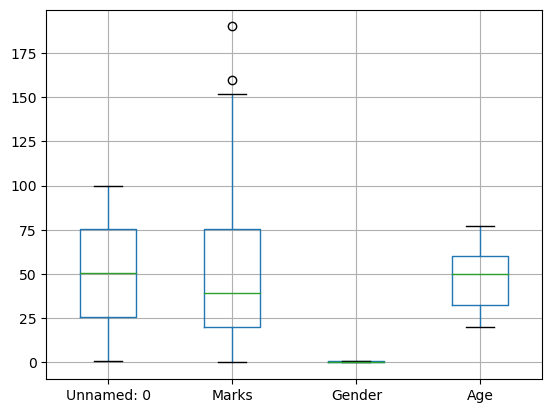

In [12]:
#Scan all numeric variables for outliers
#1. Visualization
#a. boxplot
df.boxplot()

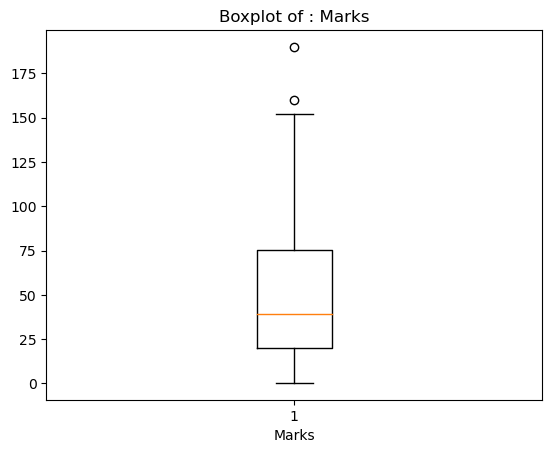

In [13]:
variable = 'Marks'
plt.boxplot(df[variable])
plt.xlabel('Marks')
plt.title('Boxplot of : ' +variable)
plt.show()

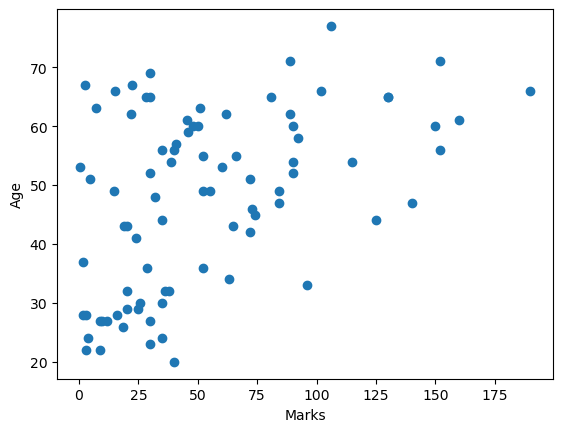

In [14]:
#b.scatterplot
x_variable = 'Marks'
y_variable = 'Age'
plt.scatter(df['Marks'],df['Age'])
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.show()

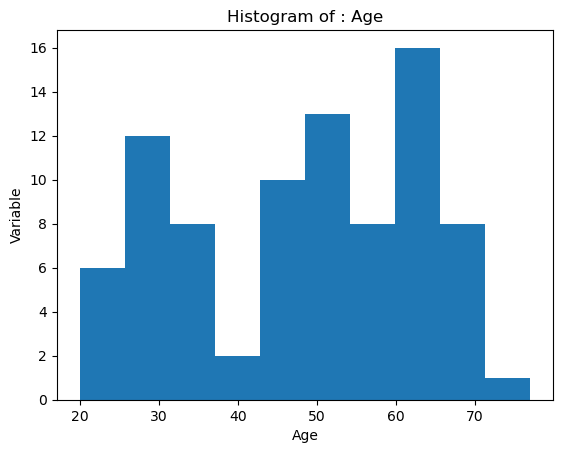

In [15]:
#C.Histogram
variable = 'Age'
plt.hist(df[variable], bins = 10)
plt.xlabel('Age')
plt.ylabel('Variable')
plt.title('Histogram of : ' + variable)
plt.show()

In [16]:
#2. Z-Score
import scipy.stats as stats
z = np.abs(stats.zscore(df['Marks']))
print(z)

0     2.082289
1     0.536179
2     0.414777
3     0.536179
4     0.654034
        ...   
95    0.807547
96    2.367940
97    1.207459
98    0.417158
99    1.155090
Name: Marks, Length: 100, dtype: float64


In [17]:
#3. IQR
Q1=np.percentile(df['Marks'] , 25 , method ='midpoint')
Q3= np.percentile(df['Marks'], 75 , method = 'midpoint')
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)

77.0 20.0
57.0


In [18]:
# IQR Removing the outliers
# Calculate the upper and lower limits
Q1 = df['Marks'].quantile(0.25)
Q3 = df['Marks'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Marks']>=upper)[0]
lower_array = np.where(df['Marks']<=lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


New Shape:  (98, 5)
